<a href="https://www.kaggle.com/code/ulrikeherold/forbes2024-firstlook?scriptVersionId=218102777" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h2>Let's have a first look into the dataset</h2>

In [1]:
# loading libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


In [2]:
# Load the CSV file
Names = pd.read_csv("/kaggle/input/forbes-billionaires-monthly-list-of-2024/forbes_names.csv", delimiter=";")
Billions = pd.read_csv("/kaggle/input/forbes-billionaires-monthly-list-of-2024/forbes_Billions2024combined.csv")
Rank = pd.read_csv("/kaggle/input/forbes-billionaires-monthly-list-of-2024/forbes_Tablerank2024combined.csv")

# print(Names.head)
# print(Billions.head)
# print(Rank.head)

column_Names_list = Names.columns.tolist()
print(column_Names_list)

column_Billions_list = Billions.columns.tolist()
print(column_Billions_list)

column_Rank_list = Rank.columns.tolist()
print(column_Rank_list)

['Person', 'ID', 'Business', 'Industry', 'Gender', 'City', 'State', 'Country_of_residence', 'Continent', 'Citizenship', 'Self_made']
['person', 'id', 'city', 'country_of_residence', 'continent', 'gender', 'net_worth_in_billionusd_2024_01', 'net_worth_in_billionusd_2024_02', 'net_worth_in_billionusd_2024_03', 'net_worth_in_billionusd_2024_04', 'net_worth_in_billionusd_2024_05', 'net_worth_in_billionusd_2024_06', 'net_worth_in_billionusd_2024_07', 'net_worth_in_billionusd_2024_08', 'net_worth_in_billionusd_2024_09', 'net_worth_in_billionusd_2024_10', 'net_worth_in_billionusd_2024_11', 'net_worth_in_billionusd_2024_12']
['id', 'person', 'city', 'country_of_residence', 'continent', 'gender', 'table_rank_2024_01', 'table_rank_2024_02', 'table_rank_2024_03', 'table_rank_2024_04', 'table_rank_2024_05', 'table_rank_2024_06', 'table_rank_2024_07', 'table_rank_2024_08', 'table_rank_2024_09', 'table_rank_2024_10', 'table_rank_2024_11', 'table_rank_2024_12']


In [3]:
# Get the number of rows in the datasets

num_Names = Names.shape[0]

print(f"The dataset forbes_names has {num_Names} rows.")

num_Billions = Billions.shape[0]

print(f"The dataset forbes_Billions2024combined has {num_Billions} rows.")

num_Rank = Rank.shape[0]

print(f"The dataset forbes_Tablerank2024combined has {num_Rank} rows.")

The dataset forbes_names has 3764 rows.
The dataset forbes_Billions2024combined has 3764 rows.
The dataset forbes_Tablerank2024combined has 3764 rows.


<h4>All 3 dataframes have 3764 rows.</h4>

Sum of all entries of the total net worth per month in 2024:
net_worth_in_billionusd_2024_01    13108.8
net_worth_in_billionusd_2024_02    13516.3
net_worth_in_billionusd_2024_03    13746.3
net_worth_in_billionusd_2024_04    14110.2
net_worth_in_billionusd_2024_05    14266.3
net_worth_in_billionusd_2024_06    14305.1
net_worth_in_billionusd_2024_07    14380.2
net_worth_in_billionusd_2024_08    14707.1
net_worth_in_billionusd_2024_09    15441.9
net_worth_in_billionusd_2024_10    15049.4
net_worth_in_billionusd_2024_11    15273.5
net_worth_in_billionusd_2024_12    15162.4
dtype: float64


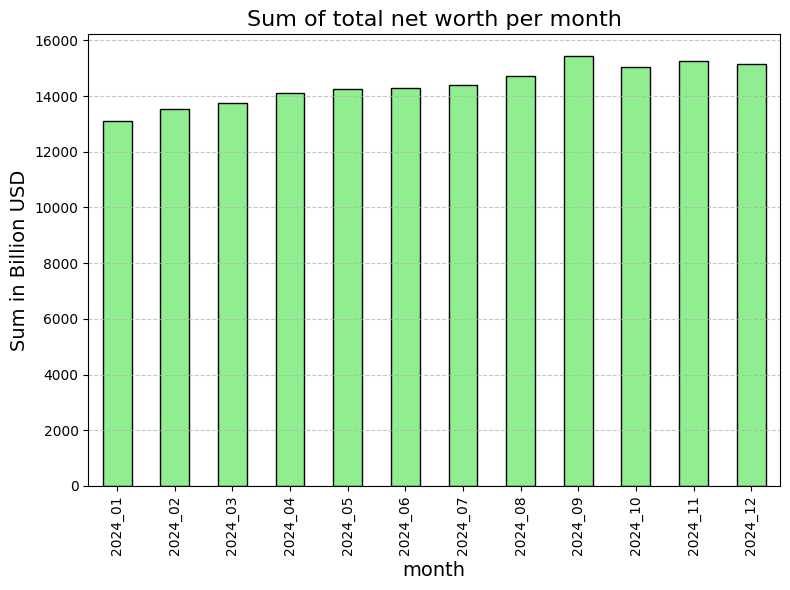

In [4]:
# Calculate the sum of the Net_worth per month in 2024 of all entries for each column
# except id
Billion_sums = Billions.drop(columns=["id"]).sum(numeric_only=True)

print("Sum of all entries of the total net worth per month in 2024:")
print(Billion_sums)

shortened_names = [col[-7:] if len(col) > 7 else col for col in Billion_sums.index]
Billion_sums.index = shortened_names

# Create the bar chart
plt.figure(figsize=(8, 6))
Billion_sums.plot(kind="bar", color="lightgreen", edgecolor="black")

# Add labels and title
plt.title("Sum of total net worth per month", fontsize=16)
plt.xlabel("month", fontsize=14)
plt.ylabel("Sum in Billion USD", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

<h4>The wealteast persons in the world got 2000 Billion USD richer in 2024. The highest total net worth was in September 2024.</h4>

Sum of all entries of the total net worth per month in 2024 (USA):
net_worth_in_billionusd_2024_01    5485.9
net_worth_in_billionusd_2024_02    5623.7
net_worth_in_billionusd_2024_03    5724.0
net_worth_in_billionusd_2024_04    5758.3
net_worth_in_billionusd_2024_05    5853.0
net_worth_in_billionusd_2024_06    5991.3
net_worth_in_billionusd_2024_07    6076.1
net_worth_in_billionusd_2024_08    6200.1
net_worth_in_billionusd_2024_09    6464.5
net_worth_in_billionusd_2024_10    6442.3
net_worth_in_billionusd_2024_11    6824.4
net_worth_in_billionusd_2024_12    6820.0
dtype: float64


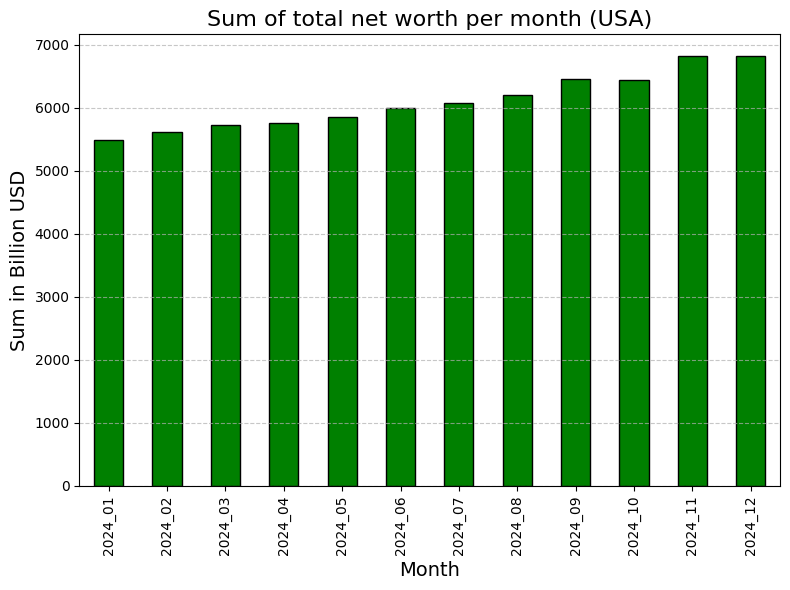

In [5]:
usa_data = Billions[Billions["country_of_residence"] == "USA"]

# Calculate the sum of the Net_worth per month in 2024 for each column except "id"
usa_sums = usa_data.drop(columns=["id"]).sum(numeric_only=True)

print("Sum of all entries of the total net worth per month in 2024 (USA):")
print(usa_sums)

# Shorten column names for the plot
shortened_names = [col[-7:] if len(col) > 7 else col for col in usa_sums.index]
usa_sums.index = shortened_names

# Create the bar chart
plt.figure(figsize=(8, 6))
usa_sums.plot(kind="bar", color="green", edgecolor="black")

# Add labels and title
plt.title("Sum of total net worth per month (USA)", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Sum in Billion USD", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [6]:
# How many Billionaires per country are in the dataset?
continent_counts = Billions["continent"].value_counts()

# Convert to a sorted list of tuples
sorted_continent_counts = continent_counts.items()

# Print the result
print("Number of Billionairs per continent in 2024 (descending order):")
print(continent_counts)

Number of Billionairs per continent in 2024 (descending order):
continent
Asia             1714
North America    1051
Europe            806
South America     111
Australia          59
Africa             20
Name: count, dtype: int64


Most billionairs are living in Asia, followed by North America and Europe.

In [7]:
# How many Billionaires per country are in the dataset?
country_counts = Billions["country_of_residence"].value_counts()

# Convert to a sorted list of tuples
sorted_country_counts = country_counts.items()

# Print the result
print("Number of Billionairs per country in 2024 (descending order):")
print(country_counts)

# Get the top 10 countries
top_10_countries = country_counts.head(10)

# Print the top 10 countries
print("Top 10 countries with the most Billionaires:")
print(top_10_countries)

Number of Billionairs per country in 2024 (descending order):
country_of_residence
China            1008
USA               953
India             249
Germany           148
Russia            127
                 ... 
Belize              1
Algeria             1
Portugal            1
Georgia             1
Liechtenstein       1
Name: count, Length: 82, dtype: int64
Top 10 countries with the most Billionaires:
country_of_residence
China          1008
USA             953
India           249
Germany         148
Russia          127
UK               94
Brazil           84
Italy            82
Switzerland      79
Japan            65
Name: count, dtype: int64


In 2024 China had the most billionaires, followed by the USA. In Europe Germany has the most billionaires.

Total sum of average net worth in 2024 for selected countries:
country_of_residence
USA        6306.850678
China      1932.319913
India      1029.800743
Germany     566.054892
Russia      496.073131
Name: average_net_worth_2024, dtype: float64


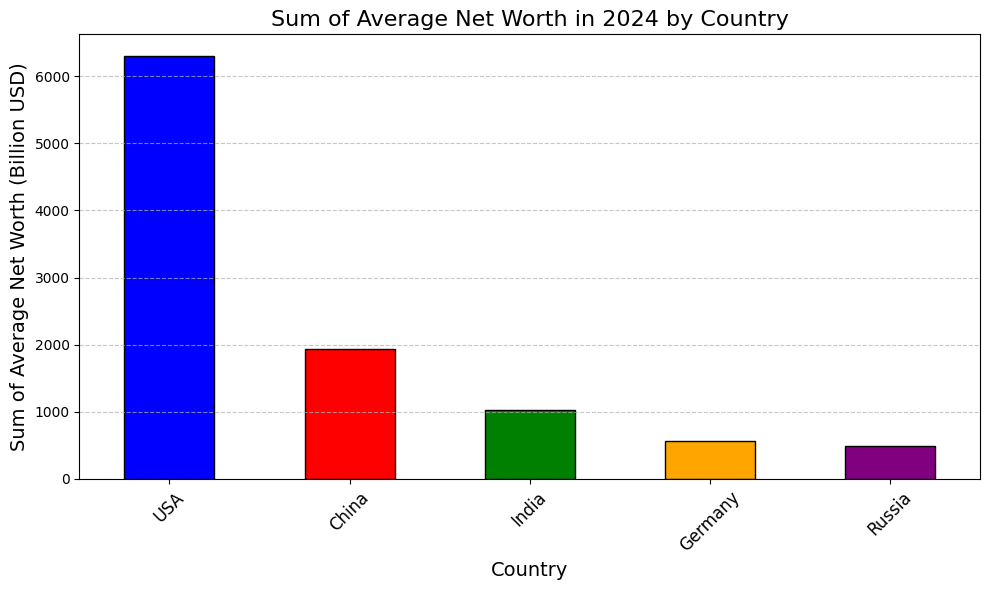

In [8]:
# List of net worth columns for 2024
net_worth_columns = [
    f"net_worth_in_billionusd_2024_{str(i).zfill(2)}" for i in range(1, 13)
]

# Add a new column for the average net worth in 2024
Billions["average_net_worth_2024"] = Billions[net_worth_columns].mean(axis=1)

# Filter the DataFrame for the top 5 countries with the most billionaires
countries_of_interest = ["USA", "China", "India", "Germany", "Russia"]
filtered_data = Billions[Billions["country_of_residence"].isin(countries_of_interest)]

# Calculate the total sum of the average net worth per country
country_sums = filtered_data.groupby("country_of_residence")["average_net_worth_2024"].sum()

# Sort the results in descending order for better visualization
country_sums = country_sums.sort_values(ascending=False)

print("Total sum of average net worth in 2024 for selected countries:")
print(country_sums)

# Create the bar chart
plt.figure(figsize=(10, 6))
country_sums.plot(kind="bar", color=["blue", "red", "green", "orange", "purple"], edgecolor="black")

# Add labels and title
plt.title("Sum of Average Net Worth in 2024 by Country", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Sum of Average Net Worth (Billion USD)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

When looking at the total sum in USD the USA has clearly the largest sum. China which has more billionaires as the USA, but the total sum is only 1/3 of the fortune of the USA billionairs.

In [9]:
# In what cities are living the most billionaires?
city_counts = Billions["city"].value_counts()

# Convert to a sorted list of tuples
sorted_city_counts = city_counts.items()

# print("Number of Billionairs per city in 2024 (descending order):")
# print(city_counts)

# Get the top 10 cities
top_20_city = city_counts.head(20)

# Print the top 20 countries
print("Top 20 cities with the most Billionaires:")
print(top_20_city)

Top 20 cities with the most Billionaires:
city
New York City    106
Beijing           95
Moscow            91
Hong Kong         79
Shenzhen          67
Shanghai          64
London            63
Mumbai            62
Hangzhou          49
San Francisco     49
Seoul             41
Guangzhou         40
Tokyo             40
Singapore         37
Taipei            31
Los Angeles       30
Bangkok           28
Delhi             27
Istanbul          27
Sao Paulo         27
Name: count, dtype: int64


736 cities have billionaires as residence. The city with the most billionaires is New York City, followed by Beijing and Moskow.

Total sum of average net worth in 2024 for selected cities:
city
New York City    681.563889
Moscow           405.381667
Mumbai           343.075000
London           298.616667
Hong Kong        291.508586
Shenzhen         203.424242
Beijing          200.820530
San Francisco    168.472926
Taipei           152.500000
Delhi            144.607222
Hangzhou         144.091010
Tokyo            129.764008
Shanghai         125.132215
Singapore        120.272222
Los Angeles      108.714683
Seoul             85.458687
Bangkok           75.955595
Sao Paulo         69.127835
Guangzhou         56.267677
Istanbul          44.913333
Name: average_net_worth_2024, dtype: float64


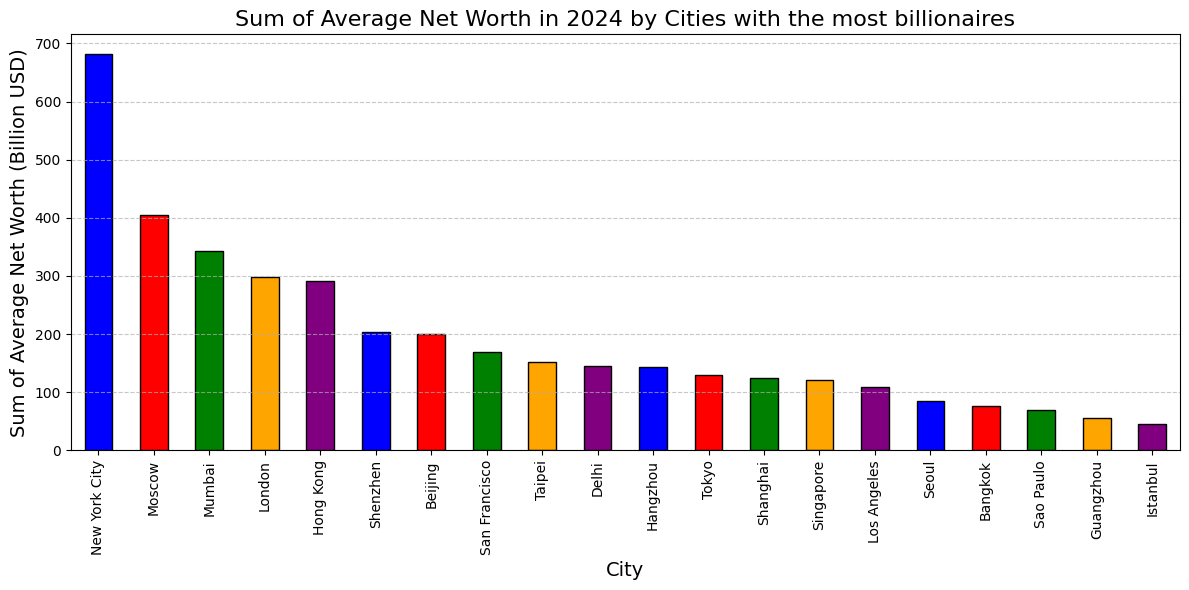

In [10]:
# List of net worth columns for 2024
net_worth_columns = [
    f"net_worth_in_billionusd_2024_{str(i).zfill(2)}" for i in range(1, 13)
]

# Add a new column for the average net worth in 2024
Billions["average_net_worth_2024"] = Billions[net_worth_columns].mean(axis=1)

# Filter the DataFrame for the top 20 cities with the most billionaires
cities_of_interest = [
    "New York City", "Beijing", "Moscow", "Hong Kong", "Shenzhen", "Shanghai",
    "London", "Mumbai", "Hangzhou", "San Francisco", "Seoul", "Guangzhou",
    "Tokyo", "Singapore", "Taipei", "Los Angeles", "Bangkok", "Delhi",
    "Istanbul", "Sao Paulo"
]
filtered_data = Billions[Billions["city"].isin(cities_of_interest)]

# Calculate the total sum of the average net worth per city
city_sums = filtered_data.groupby("city")["average_net_worth_2024"].sum()

# Sort the results in descending order for better visualization
city_sums = city_sums.sort_values(ascending=False)

# Print the results
print("Total sum of average net worth in 2024 for selected cities:")
print(city_sums)

# Create the bar chart
plt.figure(figsize=(12, 6))  # Adjust width for better visibility
city_sums.plot(
    kind="bar",
    color=["blue", "red", "green", "orange", "purple"] * 4,  # Repeat colors for all bars
    edgecolor="black"
)

# Add labels and title
plt.title("Sum of Average Net Worth in 2024 by Cities with the most billionaires", fontsize=16)
plt.xlabel("City", fontsize=14)
plt.ylabel("Sum of Average Net Worth (Billion USD)", fontsize=14)
plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [11]:
# Strip any whitespace from the 'gender' column
Billions["gender"] = Billions["gender"].str.strip()

# Recalculate the gender counts
gender_counts = Billions["gender"].value_counts()

# Print the results
print("Number of Billionaires per gender in 2024:")
print(gender_counts)

Number of Billionaires per gender in 2024:
gender
male      3347
female     416
Name: count, dtype: int64


Only 11 percent of the billionaires in 2024 were women.

In [12]:
# How many self made billionaires are in the dataset?
selfMade_counts = Names["Self_made"].value_counts()


print("Number of self made Billionairs in 2024:")
print(selfMade_counts)

Number of self made Billionairs in 2024:
Self_made
True     2095
False     768
Name: count, dtype: int64


In [13]:
# What are the most named business in the dataset?
business_counts = Names["Business"].value_counts()

# Convert to a sorted list of tuples
sorted_business_counts = business_counts.items()

# Get the top 10 businesses
top_10_business = business_counts.head(10)

# Print the top 10 businesses
print("Top 10 businesses with the most Billionaires:")
print(top_10_business)

Top 10 businesses with the most Billionaires:
Business
Real estate        221
Pharmaceuticals    123
Diversified        123
Investments        113
Software            69
Banking             60
Chemicals           56
Retail              53
Manufacturing       52
Hedge funds         47
Name: count, dtype: int64


In [14]:
# What are the most named industries in the dataset?
industry_counts = Names["Industry"].value_counts()

# Convert to a sorted list of tuples
sorted_industry_counts = industry_counts.items()

# Get the top 10 industry
top_10_industry = industry_counts.head(10)

# Print the top 10 industries
print("Top 10 industries with the most Billionaires:")
print(top_10_industry)

Top 10 industries with the most Billionaires:
Industry
Finance and Investments    531
Technology                 475
Manufacturing              427
Fashion and Retail         387
Food and Beverage          307
Healthcare                 300
Real Estate                275
Diversified                233
Media and Entertainment    146
Energy                     145
Name: count, dtype: int64


<h3> Tasks: Billionaires with the most growths in wealth (Billions and Rank) in 2024</h3>

In [15]:
# List of rank columns
rank_columns = [
    f"table_rank_2024_{str(i).zfill(2)}" for i in range(1, 13)
]

# Calculate the difference between the highest and lowest rank for each person
Rank["rank_difference"] = Rank[rank_columns].max(axis=1) - Rank[rank_columns].min(axis=1)

# Preview the updated DataFrame
print(Rank[["rank_difference"]].head())


   rank_difference
0              4.0
1              2.0
2              1.0
3              3.0
4              4.0


In [16]:
# Sort and get the top 10 persons with the highest rank_difference
top_10_rank_difference = Rank.nlargest(10, "rank_difference")

# Print the result
print("Top 10 Persons with the highest rank_difference:")
print(top_10_rank_difference[["person", "rank_difference"]])


Top 10 Persons with the highest rank_difference:
                 person  rank_difference
2683  Ernest Garcia III           1956.0
2944       Andrew Karam           1923.0
2854      Adam Foroughi           1905.0
2010     Torstein Hagen           1845.0
2897     John Krystynak           1676.0
3350       Yasuhide Uno           1664.0
1871       Zhang Xuexin           1635.0
2492        Ye Qiongjiu           1550.0
3711         Xu Gaoming           1545.0
3243          Ling Tang           1539.0


In [17]:
# List of rank columns
rank_columns = [
    f"table_rank_2024_{str(i).zfill(2)}" for i in range(1, 13)
]

# Calculate the difference between the highest and lowest rank for each person
Rank["rank_difference"] = Rank[rank_columns].max(axis=1) - Rank[rank_columns].min(axis=1)

# Determine the rank change (positive = gain, negative = loss, zero = no change)
Rank["rank_change"] = Rank["table_rank_2024_12"] - Rank["table_rank_2024_01"]

# Sort and get the top 10 persons with the highest rank_difference
top_10_rank_difference = Rank.nlargest(20, "rank_difference")

# Print the results
print("Top 20 Persons with the highest rank_difference and their rank change:")
print(top_10_rank_difference[["person", "rank_difference", "rank_change"]])

Top 20 Persons with the highest rank_difference and their rank change:
                  person  rank_difference  rank_change
2683   Ernest Garcia III           1956.0      -1801.0
2944        Andrew Karam           1923.0      -1916.0
2854       Adam Foroughi           1905.0      -1901.0
2010      Torstein Hagen           1845.0      -1835.0
2897      John Krystynak           1676.0      -1431.0
3350        Yasuhide Uno           1664.0          NaN
1871        Zhang Xuexin           1635.0      -1621.0
2492         Ye Qiongjiu           1550.0      -1084.0
3711          Xu Gaoming           1545.0          NaN
3243           Ling Tang           1539.0          NaN
2195    Stephan Schnabel           1537.0      -1346.0
2794      Michael Saylor           1532.0      -1442.0
3104            Li Liufa           1524.0          NaN
3043           Wang Ning           1522.0      -1522.0
1543           Zhou Jian           1425.0          NaN
3054  Ramesh Kunhikannan           1425.0      -1

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [18]:
# List of billions columns
billions_columns = [
    f"net_worth_in_billionusd_2024_{str(i).zfill(2)}" for i in range(1, 13)
]

# Calculate the difference between the highest and lowest amout of billions for each person
Billions["billions_difference"] = Billions[billions_columns].max(axis=1) - Billions[billions_columns].min(axis=1)

In [19]:
# Sort and get the top 10 persons with the highest billions_difference
top_10_billions_difference = Billions.nlargest(10, "billions_difference")

# Print the result
print("Top 10 Persons with the highest billions_difference:")
print(top_10_billions_difference[["person", "billions_difference"]])

Top 10 Persons with the highest billions_difference:
              person  billions_difference
1          Elon Musk                229.2
3      Larry Ellison                 87.0
0    Bernard Arnault                 69.2
75      Jensen Huang                 62.1
15   Mark Zuckerberg                 53.0
163   Changpeng Zhao                 51.3
22      Michael Dell                 43.0
2         Jeff Bezos                 41.9
19        Rob Walton                 41.7
11        Larry Page                 40.5


In [20]:
# List of billion columns
billions_columns = [
    f"net_worth_in_billionusd_2024_{str(i).zfill(2)}" for i in range(1, 13)
]

# Calculate the difference between the highest and lowest amout of Billions for each person
Billions["billions_difference"] = Billions[billions_columns].max(axis=1) - Billions[billions_columns].min(axis=1)

# Determine the amout of billions change (positive = gain, negative = loss, zero = no change)
Billions["billions_change"] = Billions["net_worth_in_billionusd_2024_12"] - Billions["net_worth_in_billionusd_2024_01"]

# Sort and get the top 10 persons with the highest billions_difference
top_10_billions_difference = Billions.nlargest(20, "billions_difference")

# Print the results
print("Top 20 Persons with the highest billions_difference and their amout of billion change are:")
print(top_10_billions_difference[["person", "billions_difference", "billions_change"]])

Top 20 Persons with the highest billions_difference and their amout of billion change are:
                           person  billions_difference  billions_change
1                       Elon Musk                229.2            226.1
3                   Larry Ellison                 87.0             66.4
0                 Bernard Arnault                 69.2            -43.2
75                   Jensen Huang                 62.1             59.7
15                Mark Zuckerberg                 53.0             37.0
163                Changpeng Zhao                 51.3             51.3
22                   Michael Dell                 43.0             43.0
2                      Jeff Bezos                 41.9             41.4
19                     Rob Walton                 41.7             39.7
11                     Larry Page                 40.5             37.5
18                     Jim Walton                 39.7             37.6
494              Prajogo Pangestu            